AIPI 590 - XAI | Assignment #04\
This notebook creates demo for 3 models from imodels: RuleFir, SLIM, and TreeGAM, using sklearn load_diabetes dataset.

Haodong He

https://colab.research.google.com/drive/1RlWvdCsQYLcRpU9IdjAiwtZG178HYxoN#scrollTo=EHfVStHdhcIR

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RlWvdCsQYLcRpU9IdjAiwtZG178HYxoN#scrollTo=EHfVStHdhcIR)



In [45]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install --upgrade imodels scikit-learn --quiet

In [39]:
from IPython.display import Image, display

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

from imodels import RuleFitRegressor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**RuleFit**\
RuleFit is a model that combines the simplicity and interpretability of linear regression with the ability to capture feature interactions. It works by learning a sparse linear model that includes both the original features and new features in the form of decision rules. These decision rules are automatically generated from decision trees, where each path through a tree becomes a rule based on the splits. This allows RuleFit to effectively model interactions between features while maintaining interpretability.

In [20]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
# Initialize the RuleFitRegressor
model = RuleFitRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

rule_df = model.visualize()
print(rule_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 2815.14
                                                  rule   coef
2                                                  bmi  65.53
3                                                   bp   2.84
25                                       s5 > -0.03388   4.43
24                                       s5 > -0.03262   3.27
23                                       bp <= 0.02359  -1.98
20                      bmi <= 0.07625 and s5 <= 0.022  -5.33
22                      bmi <= 0.07894 and s5 <= 0.022  -1.19
18  bmi <= 0.07571 and s4 <= 0.05276 and s5 <= 0.02439  -6.68
21                     bmi <= 0.00565 and s5 <= 0.0199  -0.98
11                    bmi <= 0.00511 and s5 <= 0.01704  -6.06
16    bmi <= 0.00942 and s2 <= 0.04503 and s5 <= 0.022 -12.94
10                    bmi <= 0.00403 and bp <= 0.02359  -3.12
15  bmi <= 0.00942 and s4 <= 0.03136 and s5 <= 0.02895 -10.45
27                     bp > -0.04814 and s5 > -0.00017   8.65
19                    bmi <= 0.00834 and s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


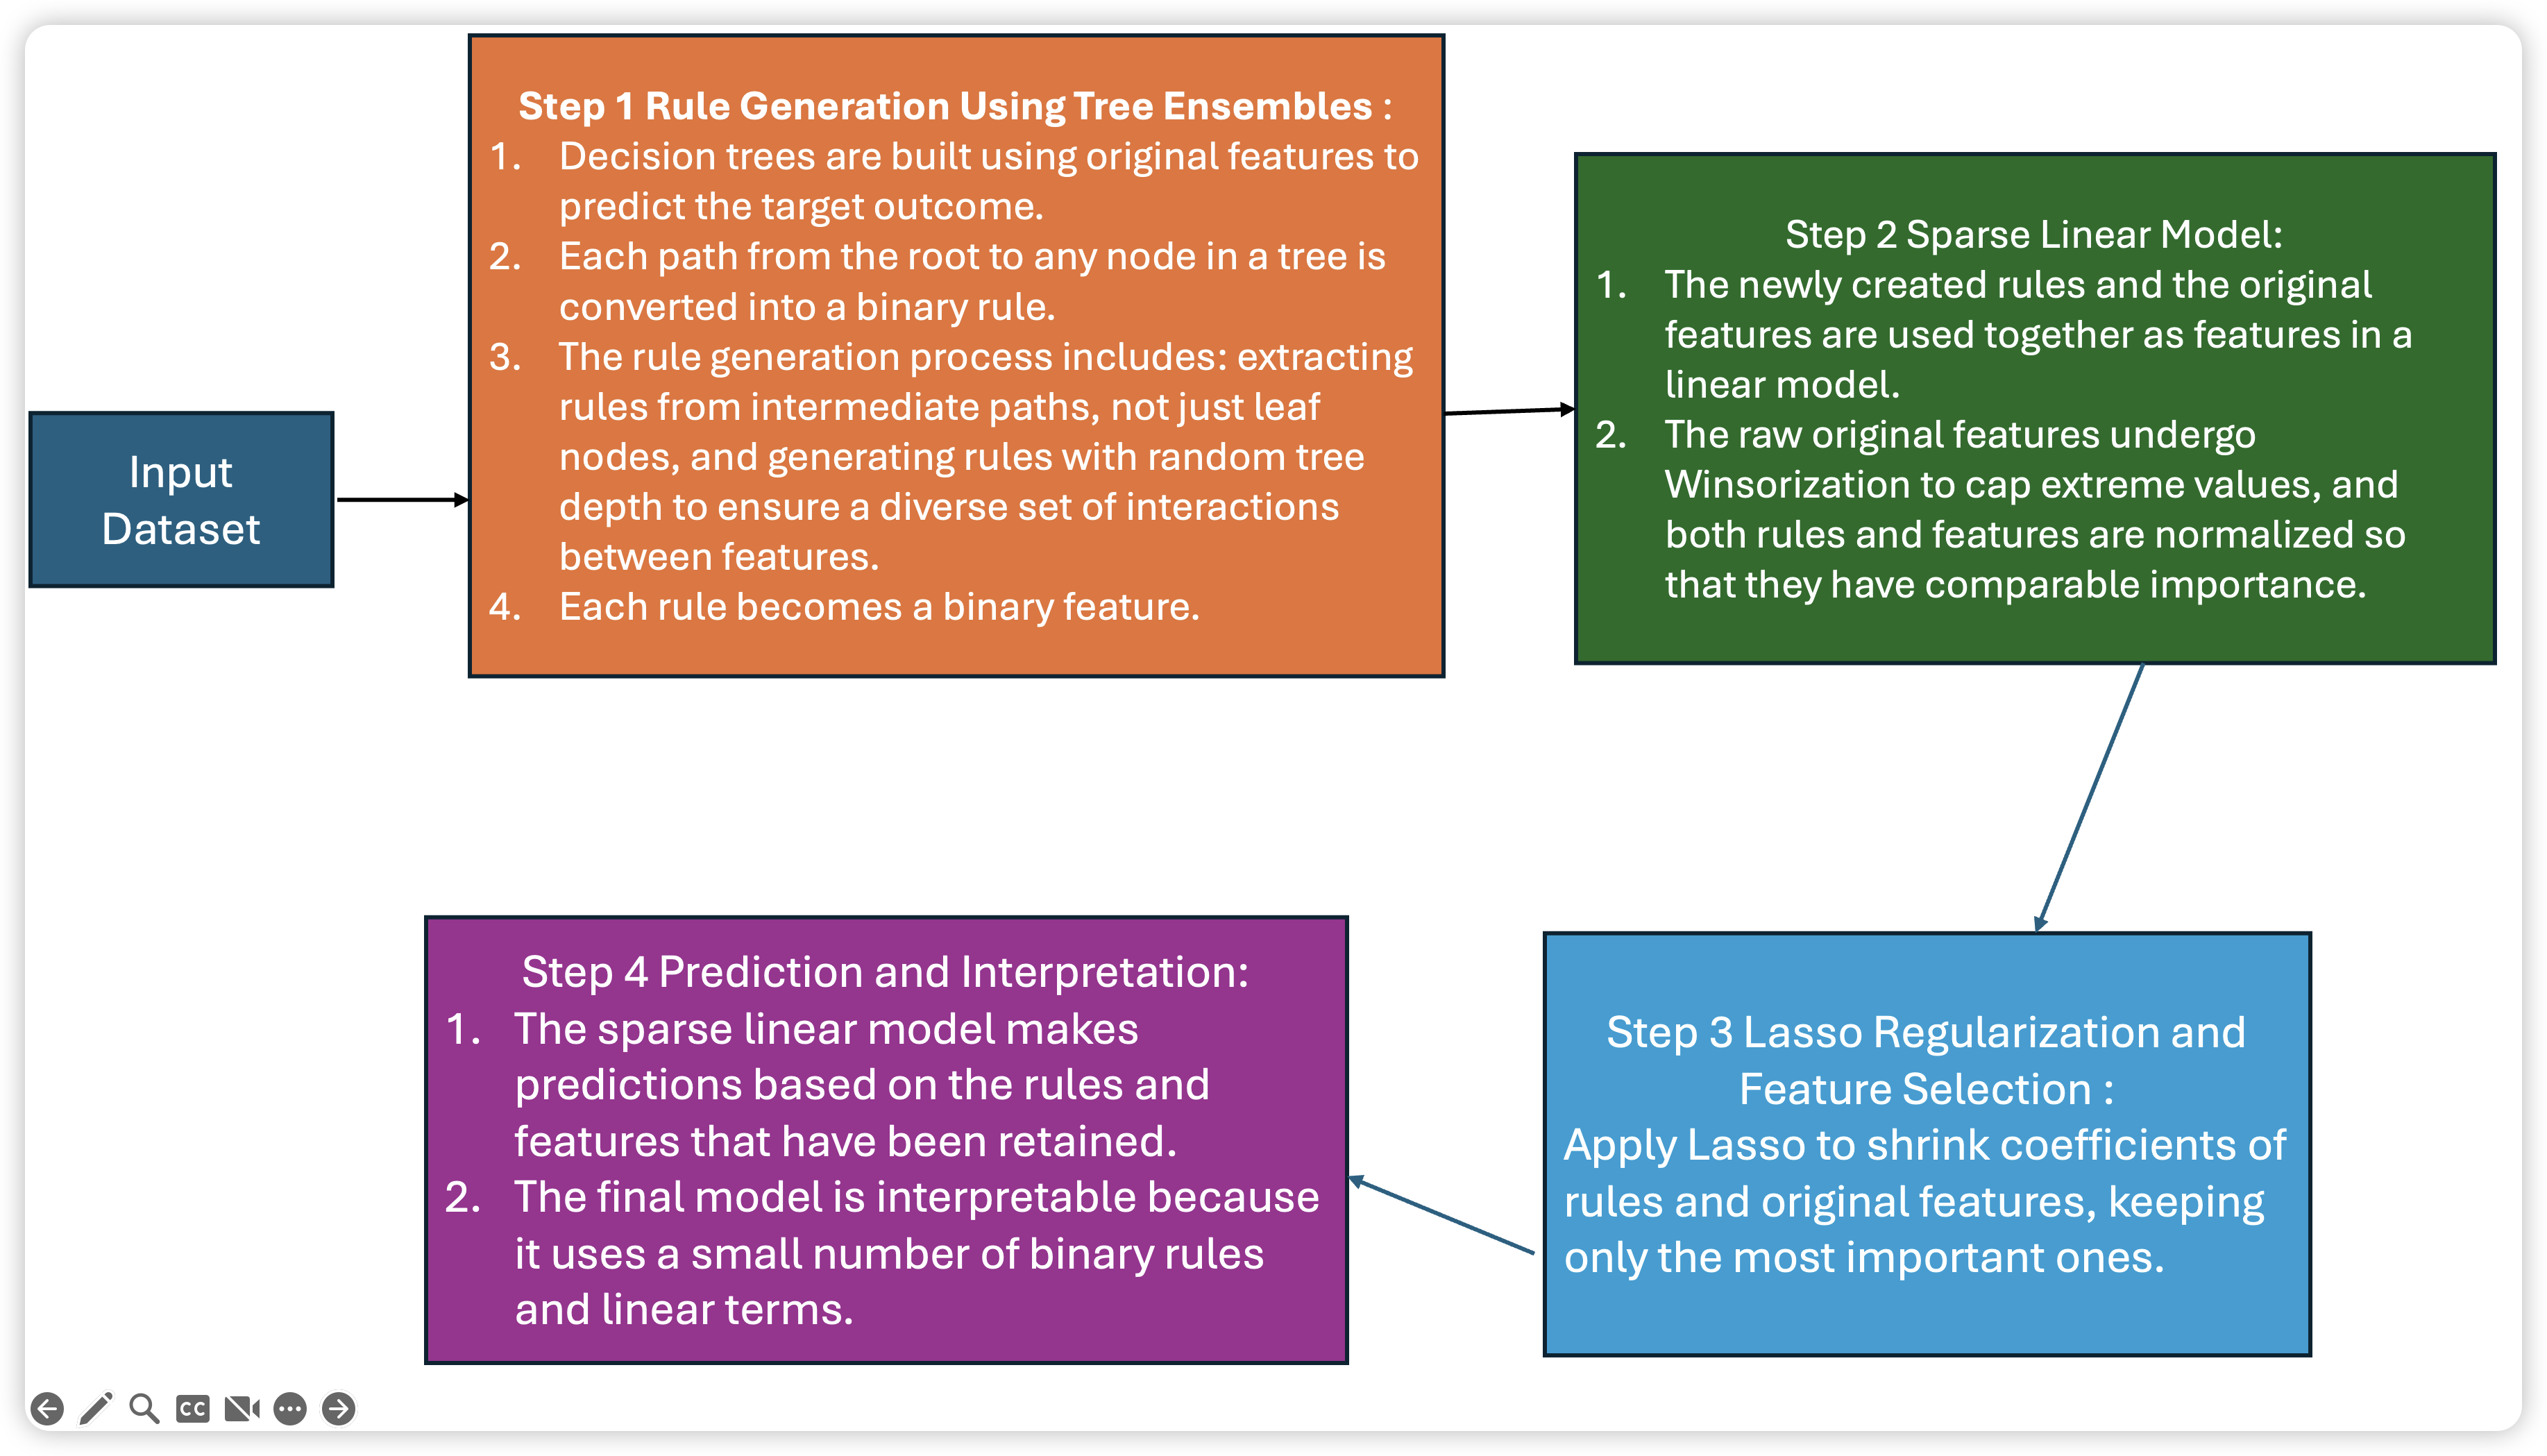

In [41]:
image_path = '/content/drive/MyDrive/assignment #04/RuleFit_Visual.jpg'
display(Image(filename=image_path))

**SLIM**\
Supersparse Linear Integer Models (SLIM) are interpretable classification models designed to produce sparse, easy-to-understand scoring systems. SLIM generates predictive models by using a sparse linear combination of features, with coefficients constrained to small integers, allowing users to make quick and practical predictions through simple arithmetic operations. Unlike complex machine learning models, SLIM prioritizes both accuracy and interpretability, making it highly suitable for applications in fields such as healthcare and criminology where transparency and practical usability are essential. The model is optimized using mixed-integer programming (MIP), balancing prediction accuracy with the number of non-zero coefficients to ensure simplicity without sacrificing performance.

In [22]:
from imodels import SLIMRegressor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Initialize the SLIMRegressor
slim_model = SLIMRegressor()

# Fit the model to the training data
slim_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/imodels/algebraic/slim.py:68: UserWarning: gurobi, mosek, or cplex solver required for mixed-integer quadratic programming. Rounding non-integer coefficients instead.
  warnings.warn("gurobi, mosek, or cplex solver required for mixed-integer "


SLIMRegressor()

In [25]:
# Make predictions on the test data
y_pred = slim_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2813.794738023665


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
internal_model = slim_model.model_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Extract coefficients
print("Coefficients:", internal_model.coef_)

# Extract the intercept
print("Intercept:", internal_model.intercept_)

Coefficients: [  28 -251  556  381 -469  167  -60  231  493   44]
Intercept: 150.96857659959093


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


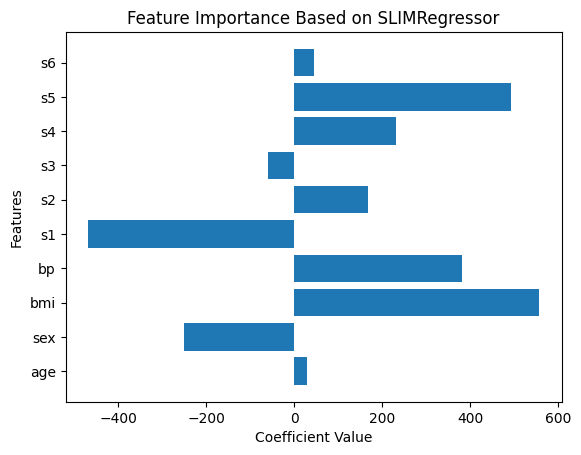

In [28]:
# Features from the dataset
features = load_diabetes().feature_names

# Plot the coefficients
plt.barh(features, internal_model.coef_)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance Based on SLIMRegressor')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


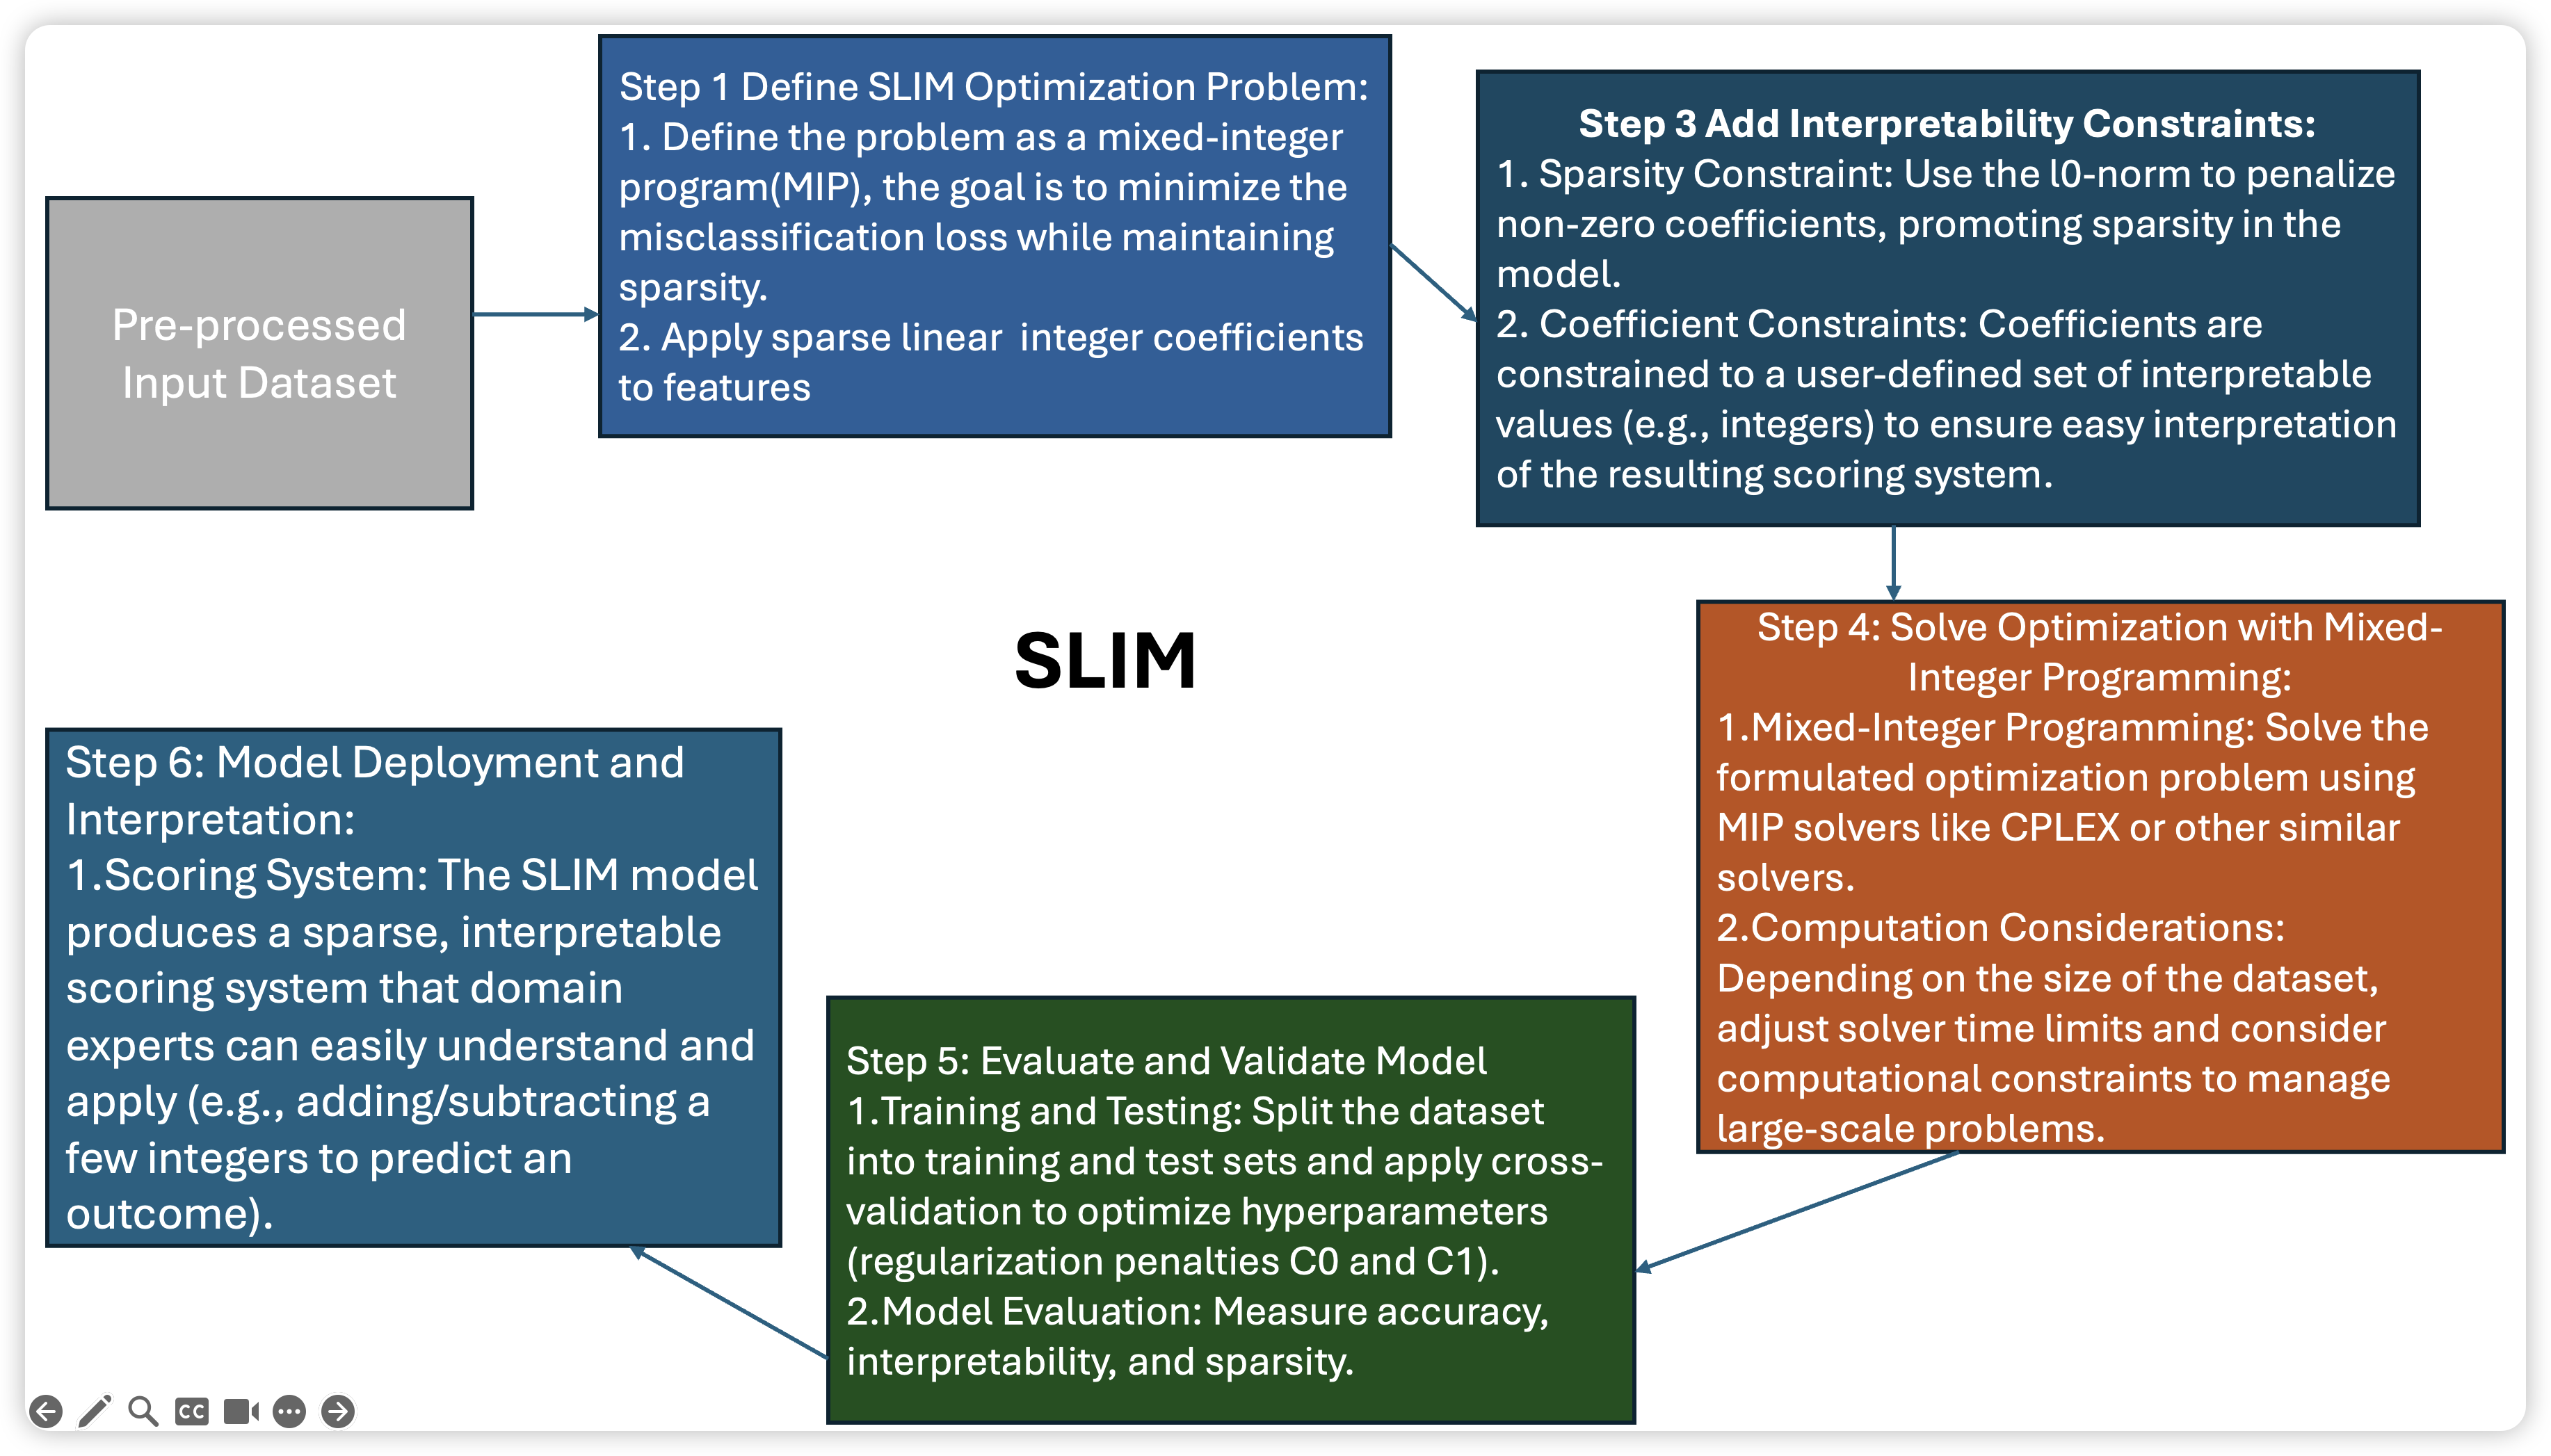

In [42]:
# SLIM_Visual
image_path = '/content/drive/MyDrive/assignment #04/SLIM_Visual.jpg'
display(Image(filename=image_path))

**TreeGAM**\
Tree-based Generalized Additive Models (TreeGAM) are an interpretable machine learning framework designed to combine the flexibility of decision trees with the intelligibility of generalized additive models (GAMs). TreeGAM fits separate tree-based shape functions to each feature and sums their contributions to make predictions. This allows the model to capture non-linear relationships between features and the target variable while maintaining interpretability, as interactions between features are excluded. Ensemble methods such as bagging and boosting are employed to enhance model accuracy and stability, making TreeGAM a powerful tool for tasks requiring both high predictive performance and transparency

In [29]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Initialize the TreeGAMRegressor
treegam_model = TreeGAMRegressor()

# Fit the model to the training data
treegam_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TreeGAMRegressor()

In [34]:
# Make predictions on the test data
y_pred = treegam_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 27013.93984962406


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


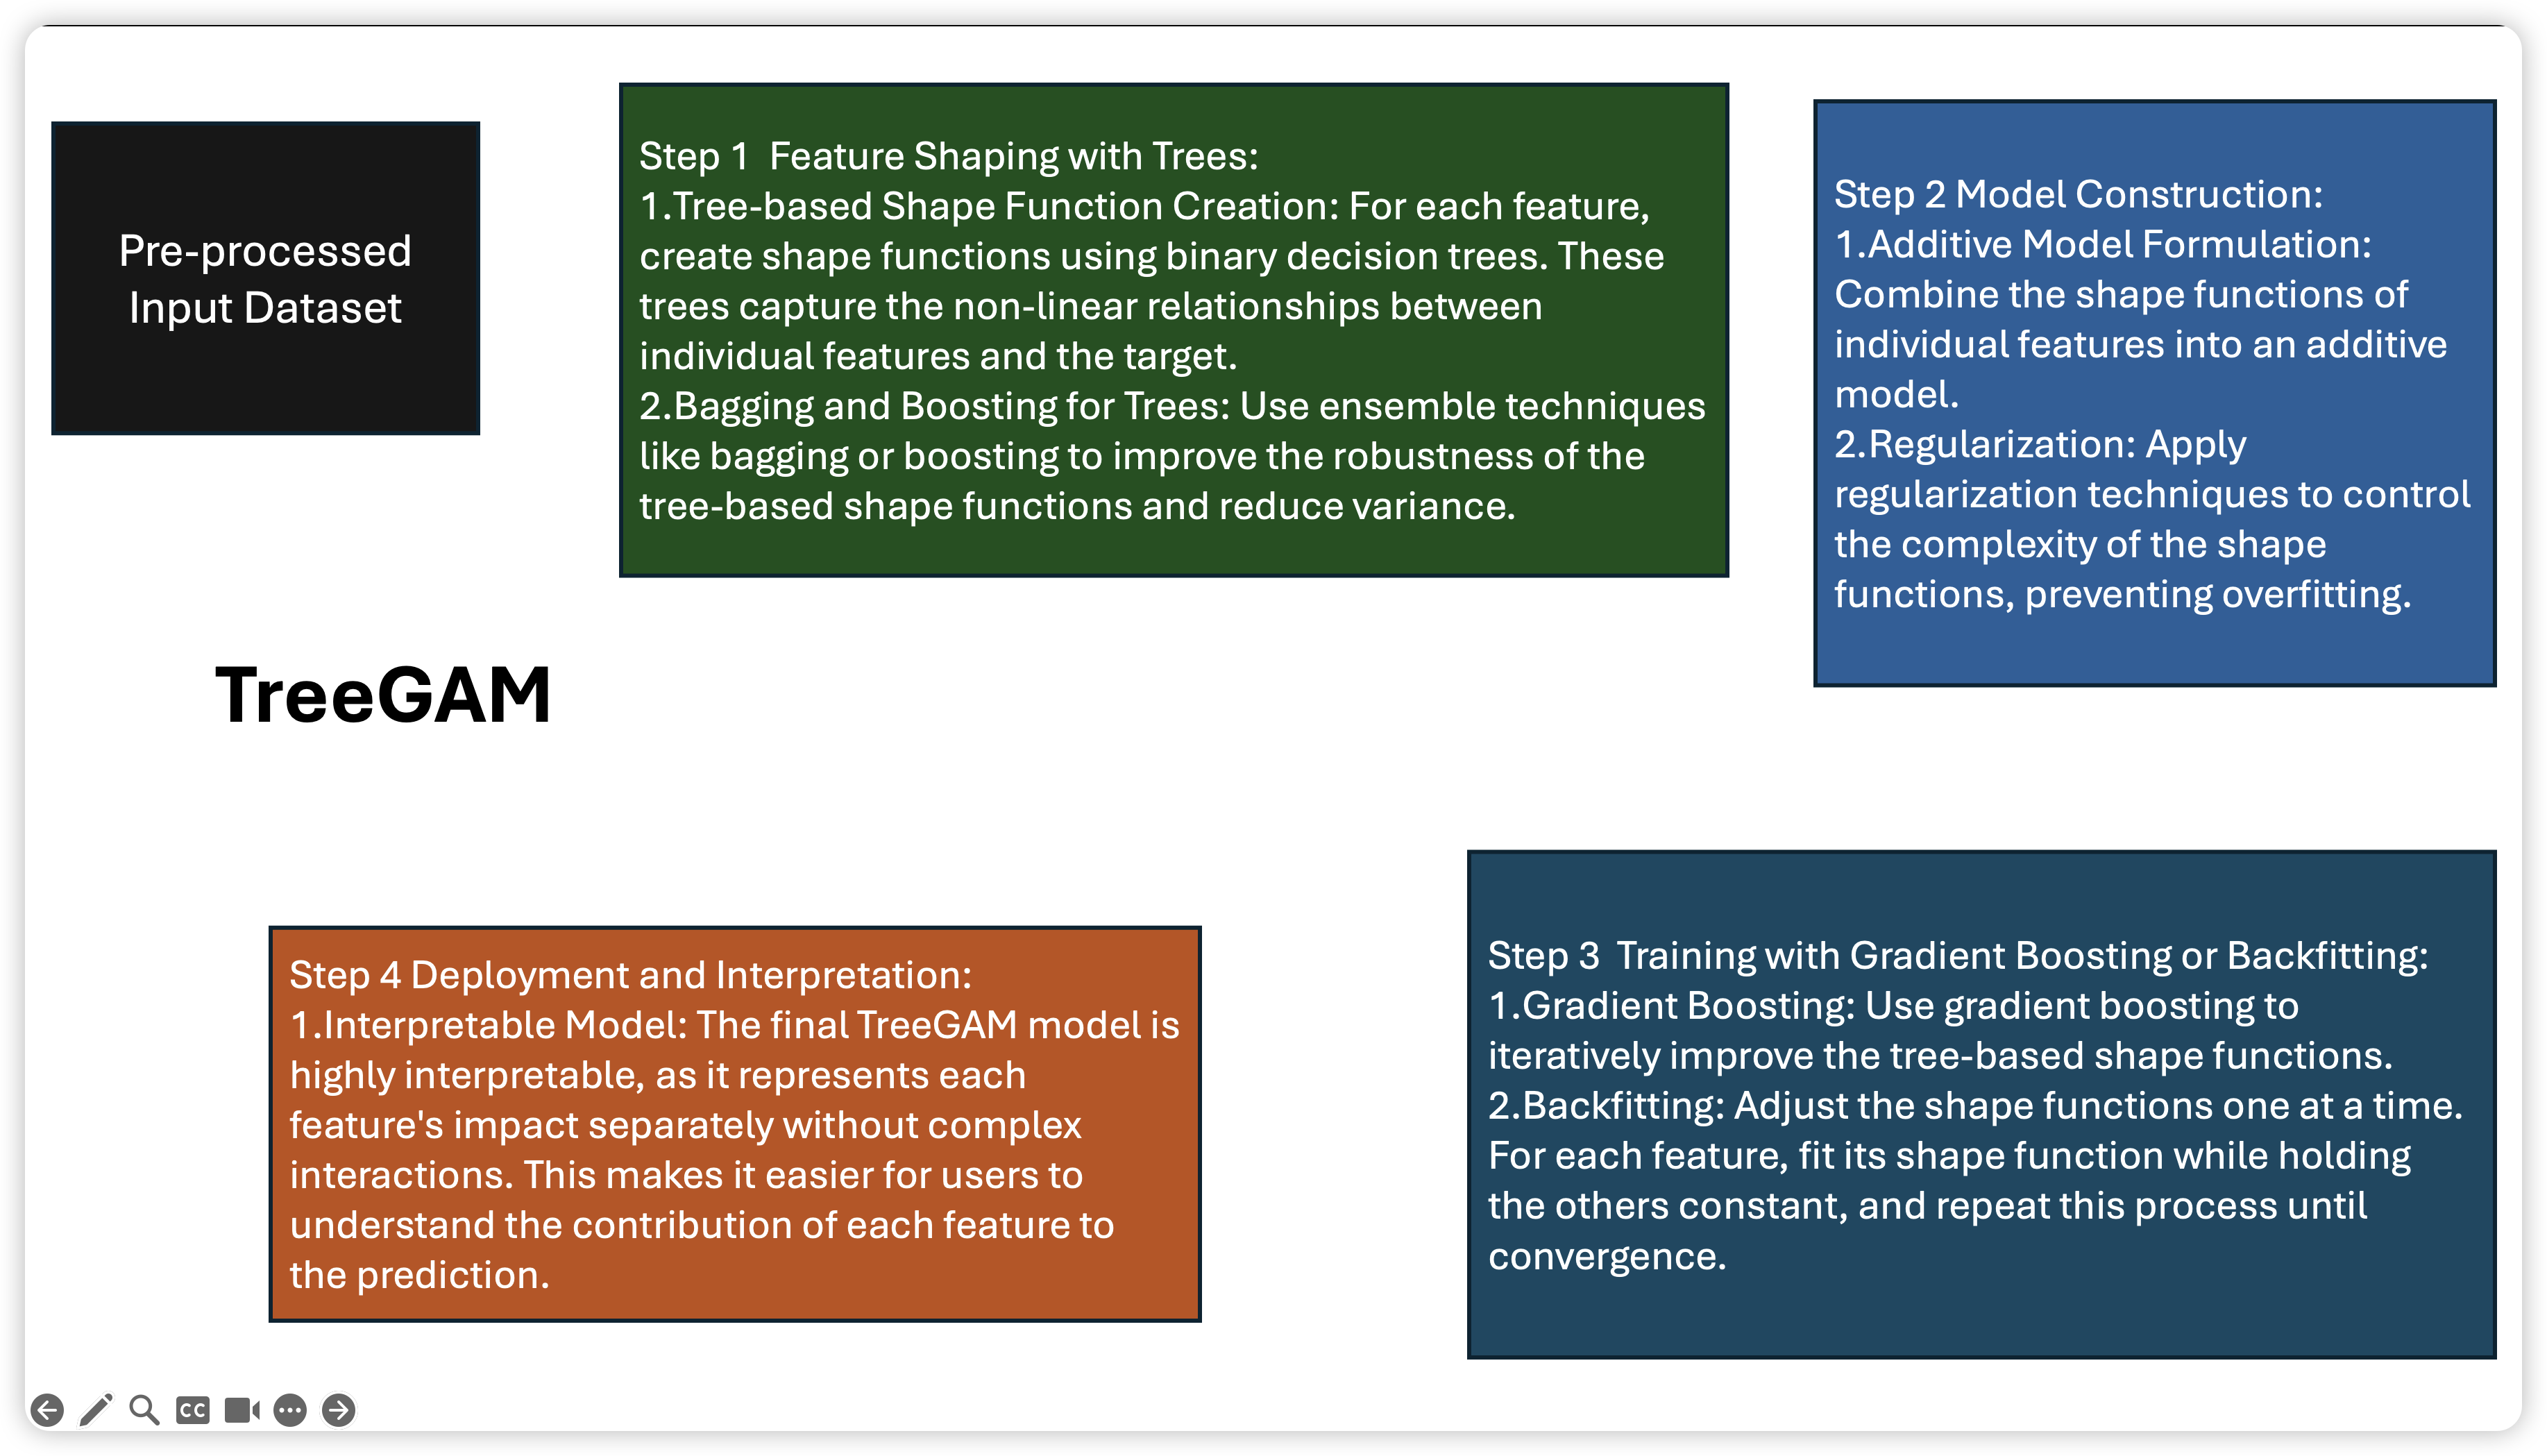

In [44]:
#TreeGAM Visual
image_path = "/content/drive/MyDrive/assignment #04/TreeGAM_VIsual.jpg"
display(Image(filename=image_path))